In [1]:
import os
import pandas as pd
import numpy as np
import glob as glob
import fnmatch as fnmatch
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-colorblind')
%matplotlib inline 
#%matplotlib notebook 

#### Functions & Calculations

In [2]:
grades = [100, 100, 90, 40, 80, 100, 85, 70, 90, 65, 90, 85, 50.5]

In [6]:
def grades_sum(scores):
  total = 0
  for score in scores: 
    total += score
  return total

print (grades_sum(grades))
    
def grades_average(grades_input):
  sum_of_grades = grades_sum(grades_input)
  average = round(sum_of_grades / float(len(grades_input)),2)
  return average

print (grades_average(grades))

1045.5
80.42


In [35]:
def grades_variance(scores):
  average = grades_average(scores)
  variance = 0
  for score in scores:
    variance += (average - score) ** 2
  return variance/float(len(scores))

print (grades_variance(grades))

334.07101538461546


#### DataFrames & Plotting

In [8]:
data1 = {'ID': [1,2,3,4],
        'Latitude' : [45, 46, 47, 48],
        'Longitude' : [-120, -121, -122, -123]}
data_df1 = pd.DataFrame(data1)
data_df1

,ID,Latitude,Longitude
0,1,45,-120
1,2,46,-121
2,3,47,-122
3,4,48,-123


In [9]:
data2 = {'ID': [1,2,3,4],
        'Latitude' : [45, 50, 55, 60],
        'Longitude' : [-120, -125, -130, -135]}
data_df2 = pd.DataFrame(data2)
data_df2

,ID,Latitude,Longitude
0,1,45,-120
1,2,50,-125
2,3,55,-130
3,4,60,-135


In [10]:
new_df = data_df1[(data_df1.Longitude != data_df2.Longitude) & (data_df1.ID == data_df2.ID)]
new_df

,ID,Latitude,Longitude
1,2,46,-121
2,3,47,-122
3,4,48,-123


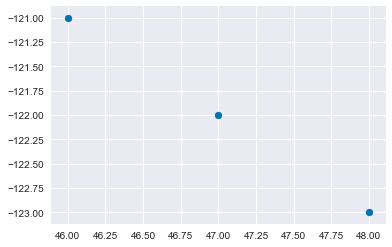

In [11]:
plt.scatter(new_df['Latitude'],new_df['Longitude'])


In [38]:
data = {'Country' : ['USA', 'USA', 'CAN', 'MEX', 'USA'],
        'ID' : [1, 2, 3, 4, 5],
       'VID': [10, 16, 15, 16, 16],
       'VTYPE': [1,3,1,2,3]}
data_df = pd.DataFrame(data)
#data_df

count_unique = data_df.groupby(['Country','VID']).size().groupby(level=0).agg({'VehicleCount':'size'}).reset_index()
print (count_unique)
#print (count_unique.info())
#data_df.groupby(['Country','Value2'])['Value2'].count()
count_by_group = data_df.groupby('Country')['Country'].agg({'TotalCount':'count'}).reset_index()
print (count_by_group)

count_by_group2 = count_by_group.merge(count_unique,on=['Country'])
count_by_group2

  Country  VehicleCount
0     CAN             1
1     MEX             1
2     USA             2
  Country  TotalCount
0     CAN           1
1     MEX           1
2     USA           3


c:\users\fitzr\appdata\local\enthought\canopy32\edm\envs\user\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
c:\users\fitzr\appdata\local\enthought\canopy32\edm\envs\user\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if sys.path[0] == '':


,Country,TotalCount,VehicleCount
0,CAN,1,1
1,MEX,1,1
2,USA,3,2


In [13]:
vehicle_type = {1:'passenger vehicle',2:'light truck',3:'heavy truck',4:'mobile device',5:'other'}

data_df['VehicleType'] = data_df.VTYPE.apply(lambda x: vehicle_type[x])
data_df

,Country,ID,VID,VTYPE,VehicleType
0,USA,1,10,1,passenger vehicle
1,USA,2,16,3,heavy truck
2,CAN,3,15,1,passenger vehicle
3,MEX,4,16,2,light truck
4,USA,5,16,3,heavy truck


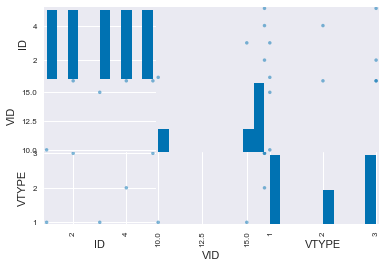

In [14]:
pd.plotting.scatter_matrix(data_df);

c:\users\fitzr\appdata\local\enthought\canopy32\edm\envs\user\lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
c:\users\fitzr\appdata\local\enthought\canopy32\edm\envs\user\lib\site-packages\numpy\core\_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\fitzr\appdata\local\enthought\canopy32\edm\envs\user\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
c:\users\fitzr\appdata\local\enthought\canopy32\edm\envs\user\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
c:\users\fitzr\appdata\local\enthought\canopy32\edm\envs\user\lib\site-packages\statsmodels\nonparametric\kdetool

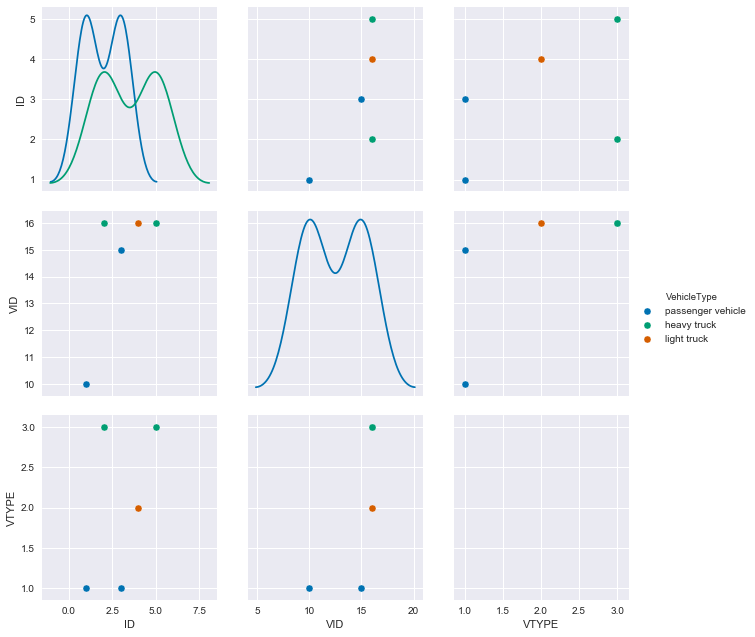

In [15]:
sns.pairplot(data_df, hue='VehicleType', diag_kind='kde', size=3);

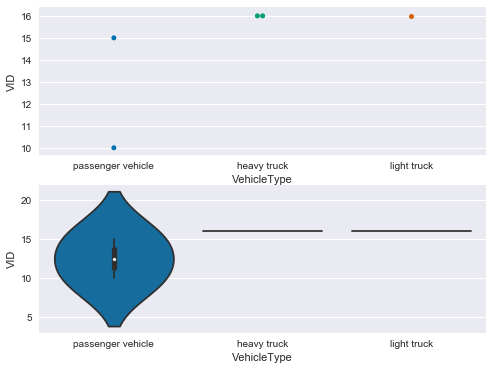

In [16]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.swarmplot(x='VehicleType', y='VID', data=data_df);
plt.subplot(212)
sns.violinplot(x='VehicleType', y='VID', data=data_df);
#sns.violinplot?

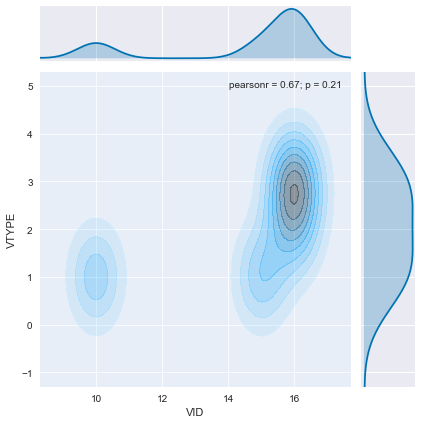

In [17]:
sns.jointplot(data_df['VID'], data_df['VTYPE'], alpha=0.4, kind='kde');

#### Slicing / Indexing & Loops

In [18]:
#numpy.random.normal(mean, standard deviation, (rows,columns))
a = np.random.normal(2,.9,(5,5))
print (a)

[[ 2.21614272  0.76323637  1.37812227  2.85140854  2.88410326]
 [ 1.98026178  2.88732867  4.38341975  1.67299288  0.49691581]
 [ 2.11369818  1.79685743  3.58779621  0.52874925  2.28909421]
 [ 1.46122204  1.60279619  1.59932382  1.78804032  2.54565701]
 [ 2.6258162   2.40755169  0.78299356  2.44060565  2.71689827]]


In [41]:
b = a[3:,:-1] #rows, columns
b

array([[ 1.46122204,  1.60279619,  1.59932382,  1.78804032],
       [ 2.6258162 ,  2.40755169,  0.78299356,  2.44060565]])

In [43]:
nums = [1,2,3,5,7,9]

print (nums[1::2])

[2, 5, 9]


In [21]:
def purify(lst):
    res = []
    for ele in lst:
        if ele % 2 == 0:
            res.append(ele)
    return res
print (purify(nums))

[2]


In [30]:
def mult_num(lst):
  total = 1
  for i in lst:
    total *= i
  return total
print (mult_num(nums))

1890


In [45]:
fname = 'testfile.txt.gz'
oname = fname.split('.')[1:-1]
print (oname)

['txt']


In [24]:
name = ['spotify.exe','spotify2.exe','spotify3.exe','spotfiy.exe','spotifyxsetup.exe']
#globbed_files = glob.glob("spotify*") #creates a list of all csv files

matching_files = []

for item in name:
    if fnmatch.fnmatch(item, 'spotify*.exe') or fnmatch.fnmatch(item, 'spotify*setup.exe'):
        matching_files.append(item)
        
print (matching_files)

['spotify.exe', 'spotify2.exe', 'spotify3.exe', 'spotifyxsetup.exe']


In [25]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
Y

array([-0.23857229,  1.14828274, -1.13701871, ..., -0.5452015 ,
        0.01435406,  0.05837137])

In [26]:
arr_size = 5;
arr = [0,2,4,6,8];
k = 4;
for n in arr:
    if (n == k):
        print ("yes")

    else:
        print ("no")


no
no
yes
no
no


In [32]:
arr = [1,3,7]

def max_num(arr):
    for n in arr:
        val1 = arr[1] - arr[0]
        val2 = arr[2] - arr[1]
        val3 = arr[2] - arr[0]
    return val1, val2, val3

newArr = [val1,val2,val3]
highest = max(newArr)

#    for i in newArr:
#        print (i)
#        if (newArr[i] > highest):
#            highest = newArr[i]
print (highest)

6


#### Plotting & MapBox

In [28]:
#os.getcwd()
#Use the following to create a map in jupyter notebook. An existing dataframe is a prerequisite for using the code.  Run each piece of code in a new cell.  Refer to the following website for more info: https://www.ryanbaumann.com/blog/2016/4/3/embedding-mapbox-plots-in-jupyter-notebooks

#create test dataframe if desired


data = {'Latitude' : [45, 46, 47, 48],
        'Longitude' : [-120, -121, -122, -123]}
data_df = pd.DataFrame(data)
data_df

,Latitude,Longitude
0,45,-120
1,46,-121
2,47,-122
3,48,-123


In [3]:
#Converts a dataframe to a geojson Point output
def df_to_geojson(data_df, properties, lat='Latitude', lon='Longitude'):
    geojson = {'type':'FeatureCollection', 'features':[]}
    for _, row in data_df.iterrows():
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Point',
                               'coordinates':[]}}
        feature['geometry']['coordinates'] = [row[lon],row[lat]]
        for prop in properties:
            feature['properties'][prop] = row[prop]
        geojson['features'].append(feature)
    return geojson

In [10]:
#

cols = []
geojson = df_to_geojson(data_df, cols)
center = [data_df.Longitude.mean(), data_df.Latitude.mean()]
geojson

{'features': [{'geometry': {'coordinates': [-120, 45], 'type': 'Point'},
   'properties': {},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-121, 46], 'type': 'Point'},
   'properties': {},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-122, 47], 'type': 'Point'},
   'properties': {},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-123, 48], 'type': 'Point'},
   'properties': {},
   'type': 'Feature'}],
 'type': 'FeatureCollection'}

In [11]:
#

from IPython.display import Javascript
Javascript("""window.vizObj={};""".format(geojson))

<IPython.core.display.Javascript object>

In [12]:
#
Javascript("""window.cenObj={};""".format(center))


<IPython.core.display.Javascript object>

In [13]:


from IPython.display import HTML
HTML("""
<style> #map {
  position: relative;
  width: auto;
  height: 650px;
  overflow:visible;
}
</style>
""")



In [14]:
%%javascript
require.config({
  paths: {
      mapboxgl: 'https://api.tiles.mapbox.com/mapbox-gl-js/v0.21.0/mapbox-gl',
      bootstrap: 'https://maxcdn.bootstrapcdn.com/bootstrap/3.3.6/js/bootstrap.min'
  }
});

<IPython.core.display.Javascript object>

In [15]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;
require(['mapboxgl', 'bootstrap'], function(mapboxgl, bootstrap){
    mapboxgl.accessToken = 'pk.eyJ1IjoibmZpdHpwYXRyaWNrIiwiYSI6ImNqMmpkZDM3MzAxaHoyd211ZWprejFna2EifQ.eoC9DVtUZTWUGVxy9VlE4w';
    var map = new mapboxgl.Map({
        container: 'map', // container id
        style: 'mapbox://styles/mapbox/light-v9', //stylesheet location
        center: window.cenObj, //[-39.14586151999999, -16.505109735999998],// starting position
        zoom: 6, // starting zoom
        pitch: 1 // pitch in degrees
    });


    function addSegLayer(mapid) {
        // Mapbox GL JS Api - import segment
        var segment_src = new mapboxgl.GeoJSONSource({
            data: window.vizObj,
            maxzoom: 18,
            buffer: 1,
            tolerance: 1
        });
        try {
            mapid.addSource('points', segment_src);
            mapid.addLayer({
                id: 'points',
                type: 'circle',
                source: 'points',
                paint: {
                    "circle-radius": 8,
                    "circle-color": 'chartreuse',
                }
            });
        } catch (err) {
            console.log(err);
        }
    };

    map.once('style.load', function(e) {
        addSegLayer(map);
        map.addControl(new mapboxgl.Navigation({
            position: 'top-left'
        }));
    });
    //map.setPitch(1);

});
element.append("<div id='map'></div>"); //style=width: 1500px; height: 1500px;


<IPython.core.display.Javascript object>